__Credit Fraud Detection using SMOTE__

__Objective:__<br>
To detect Credit Fraud accurately given that there is a class imbalance. 

__What is Class Imbalance?__ 
<br>
-  In the dataset that we are going to explore,  0.172% of the observations contain one label (Minority Class) and the rest contain the other label (Majority Class). 
-  Directly applying a machine learning algorithm to this data will result in overfitting, i.e The algorithm gives biased predictions and results in incorrect accuracy scores. <br>
__Examples__ : Credit Fraud, Rare Diseases, Manufacuring defects.

__How to Overcome this?__
<br>
-  This problem can be overcome be resampling data, i.e, by either increasing the minority class observations (Oversampling) or by reducing the majority class observations (Undersampling)<br>
-  Undersampling techniques may lead to loss of accuracy since several observations will be removed. This is subjectable to the data you are using.

__Here, we are going to use an Oversampling technique called SMOTE__
-  SMOTE is an abbreviation for Synthetic Minority Oversampling technique
-  In short, these are the steps involved in SMOTE:
    1. SMOTE calculates the difference between a feature vector and its nearest neighbour.
    2. Multiplies this difference by a random value between 0 and 1
    3. Adding this result to the feature vector results in a new point on the line
-  This way, new observations are synthetically generated from existing observations. Since we are replicating data, this could result in Overfitting, Let us analyse It. 

  __FLOWCHART__  

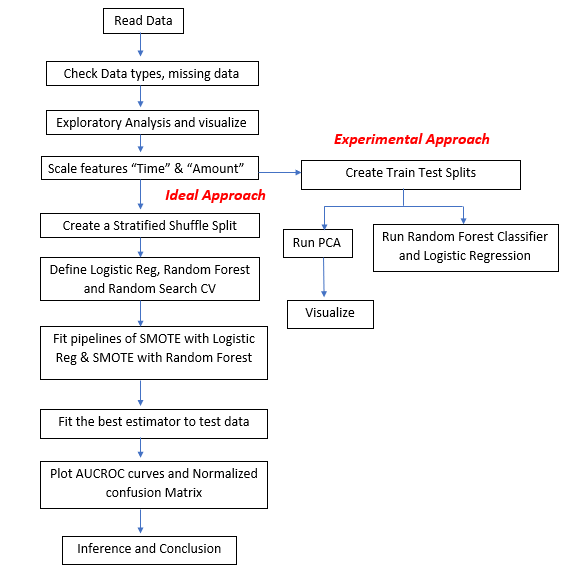

In [1]:
from IPython.display import Image
Image(filename='FLow.png') 

_Import Data analysis and visualization libraries_

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline   

_Import Preprocessing and Dimensionality reduction algorithms_

In [2]:
import sklearn.preprocessing as sp
from sklearn.decomposition import PCA   
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import IncrementalPCA

_Import Split and SMOTE(Over-sampling algorithm)_

In [3]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

_Import Classifiers_

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

_Import Gridsearch, Pipeline and Evaluation libraries_

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline
import sklearn.metrics as metrics

__Dataset Source:__
<br>
This Dataset is taken from __[Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/home)__ 

__Acknowledgements:__ 
<br>
__Citations for the Dataset:__<br>
Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015
<br>
__Ideas:__<br>
__[Alexander Bachmann](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)__

__About the Dataset:__<Br>
-  A set of transactions made between two days by European Customers during September 2013.
-  There are a total of  284,807 Transactions, out of which 492(.0172%)are Fraudulent.
-  Due to confidentiality issues, all features except Time and amount have been scaled and PCA applied. While we won't know what features we are working on, the dataset consists of important Principal components that can be used for the analysis.


__Read Data__

In [6]:
df=pd.read_csv('creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


__Check data types, missing values and describe__

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values, let's check the datatypes

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The feature 'time' is in seconds(float) and the max value is 172792( Total seconds over two days is 172800) 

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


__Exploratory Data Analysis__

__Plot 1__: Class distribution 

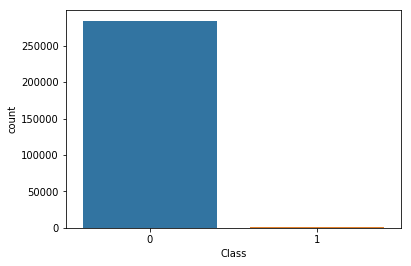

In [11]:
sns.countplot(x='Class', data=df)

__Plot 2:__ Amount of transaction vs Class

In [12]:
#Create subsets of Data
Normal_Transaction = df[df["Class"]==0]
Fraud_Transaction = df[df["Class"]==1]

[]

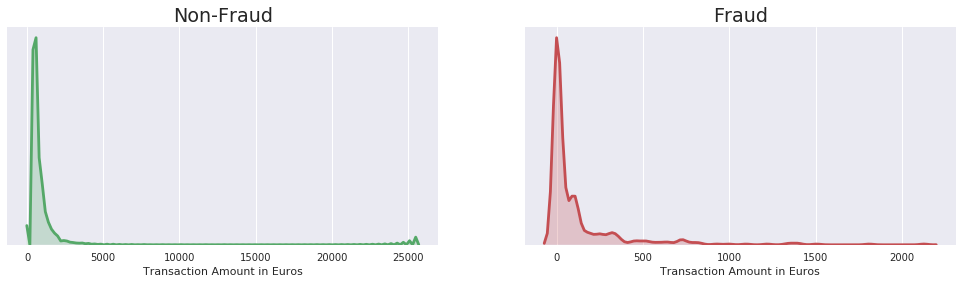

In [13]:
#Distribution plot with a dark grid and a few style elements for better visibility
sns.set(style="darkgrid",color_codes=True)
f, axes = plt.subplots(nrows=1, ncols=2,figsize=(17, 4), sharex=False) #Sharex=false-The plots are independent
sns.despine(left=True)
sns.set_context("poster")
#First plot
ax1=sns.distplot(Normal_Transaction.Amount, hist=False, color="g", kde_kws={"shade": True}, ax=axes[0])
ax1.set_title('Non-Fraud')
ax1.set_xlabel('Transaction Amount in Euros')
#Second Plot
ax2=sns.distplot(Fraud_Transaction.Amount,hist=False, color="r", kde_kws={"shade": True}, ax=axes[1])
ax2.set_title('Fraud')
ax2.set_xlabel('Transaction Amount in Euros')
#Remove Y axis labels
plt.setp(axes, yticks=[])

__Two points can be infered from the above plots:__
-  In Non-Fraud cases, the distribution is mostly between 0-2000 Euros and there are some transactions around 25000 Euros(outliers).
-  On the other hand, In Fraud cases, the range is comparatively less and most transactions are between 0-250 Euros. This clearly shows a pattern that the Fraudsters in study tend to avoid risks and make selective frauds in small amounts. 

__Plot 3:__ Time of Day vs Class

Text(0.5,1,'Time of Transaction vs Class')

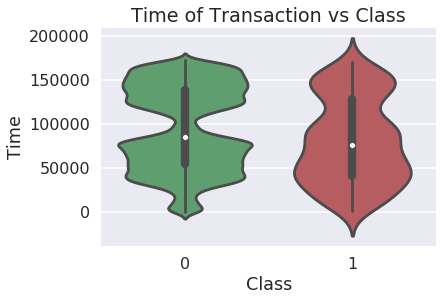

In [14]:
ax=sns.violinplot(data=df,x='Class',y='Time',palette=['g','r'])  #no regression line     
ax.set_title("Time of Transaction vs Class")

__Interpretation__:
<br>
Here, our assumption is that the data has been collected from 9 AM of day 1 to 9 AM of day 3.
- Lets say 86400 seconds constitute Day 1 and the other half is day 2<br>
- Day 1: There has been high activity around time=50000 seconds. 50000/3600 ~=14; Many fradulent transactions have taken place  at 10PM to 12 PM.
- Day 2: Less than half the activity has occured on day 2.
- Day 3: There is a small surge at 150000 seconds, translating to 2 AM (9 AM of day 2 + ((150000-64000)/3600)) of Day 3.
- During Investigations, these periods can be looked into closely.

__Scaling__
<br>

All features in our Data have been scaled except 'Time' and 'Amount'. Sklearn.preprocessing has so many scalers. Which one do we pick?
Let's look at our data.
- Time and Amount are both skewed distributions.
- StandardScaler requires data to be atleast close to a Normal Distribution. 
- Hence let's pick Robust Scaler, which is insusceptible to Outliers
- Instead of removing the Mean and scaling data to unit variance, Robust scaler removes the median and scales data to the  InterQuartile range(Q3-Q1), thereby removing outliers

In [15]:
scaler=sp.RobustScaler()
#Transform using scaler and transform 1D array to 2D array(n_samples,n_features)
df['Scaled Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1)) 
df['Scaled Time']=scaler.fit_transform(df['Time'].values.reshape(-1,1))
Y=df['Class'].values.reshape(-1,1).copy()
#Drop Columns and Print Shape
Scaled_df=df.drop(labels=['Time','Amount','Class'],axis=1)
print("Shape of target:{}".format(Y.shape)+'\n'+"Shape of Data:{}".format(Scaled_df.shape))

Shape of target:(284807, 1)
Shape of Data:(284807, 30)


__EXPERIMENTAL APPROACH__

- Why do we need to use SMOTE? Why not directly use popular machine learning algorithms like Random Forest and Logistic Regression? 
- In order to understand this better, we are going to do exactly that. Later, after following the ideal approach, we are going to compare both approaches and see which one works better.

__Train test split__

In [16]:
X_train, X_test, Y_train, Y_test = tts(Scaled_df,Y, test_size=0.25, random_state=7)
Y_train=Y_train.ravel()
Y_test=Y_test.ravel()

__Fit a random forest without resampling or transformations__

In [17]:
model_rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
Y_pred_rf=model_rf.fit(X_train, Y_train).predict(X_test)
confusion_rfc = metrics.confusion_matrix(Y_test, Y_pred_rf)
rf1_fpr, rf1_tpr, rf1_thresold = metrics.roc_curve(Y_test,Y_pred_rf)

__Fit Logistic Regression without resampling or transformations__

In [19]:
model_logreg=LogisticRegression()
model_logreg.fit(X_train, Y_train)
score=model_logreg.score(X_test, Y_test)
print("Score: ", round(score*100, 3))

Score:  99.906


In [20]:
Y_pred_logreg=model_logreg.fit(X_train, Y_train).predict(X_test)
confusion_logreg = metrics.confusion_matrix(Y_test, Y_pred_logreg)
columns = ['Non-Fraud', 'Fraud']
print("Classification report:\n\n",metrics.classification_report(Y_test, Y_pred_logreg, target_names=columns))
log1_fpr, log1_tpr, log1_thresold = metrics.roc_curve(Y_test,Y_pred_logreg)

Classification report:

              precision    recall  f1-score   support

  Non-Fraud       1.00      1.00      1.00     71076
      Fraud       0.86      0.56      0.68       126

avg / total       1.00      1.00      1.00     71202



__Note:__ Look at the model score for logistic regression; 99.906. This means the model should accurately classify Non-frauds and frauds, right? Let us check this at the end.

__PCA:__<br>
We notice that our features have been reduced using PCA. What if they were not? 
-  We have 30 features in our dataset, let us say they are not PCA transformed. Which Dimensionality Reduction algorithm would we apply to it? 
-  PCA transforms the linear relationship between features to orthogonal ones.  PCA kind of centers the data and then, it looks for a direction of maximum variance! The one that explain the most variance is our first Principal component.
-  Another technique that yields good results is t-SNE. It finds euclidean distance between two datapoints and constructs a probability distribution. The datapoints with high similarity have more probability of being picked.  These higher dimensionality points are then plotted onto a Low-dimensional plane. This way, similar classes are group together efficiently.

In [21]:
X=Scaled_df.copy()
Y=Y.ravel()
#PCA 
t0 = time.time()
X_PCA = PCA(n_components=2, svd_solver='full',random_state=7).fit_transform(X)
t1=time.time()
print("Time taken for PCA is {:3}s".format(t1-t0))
print(X_PCA.shape)

Time taken for PCA is 0.5224571228027344s
(284807, 2)


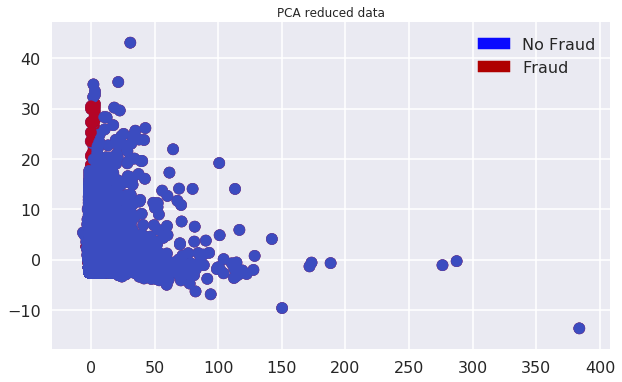

In [22]:
# Plot - PCA
f, (ax1) = plt.subplots(1, 1, figsize=(10,6))
class0 = Patch(color='#0A0AFF', label='No Fraud')
class1 = Patch(color='#AF0000', label='Fraud')
ax1.scatter(X_PCA[:,0], X_PCA[:,1], c=(Y == 0),cmap='coolwarm',label='No Fraud')
ax1.scatter(X_PCA[:,0], X_PCA[:,1], c=(Y == 1),cmap='coolwarm',label='Fraud')
ax1.set_title('PCA reduced data', fontsize=12)
ax1.legend(handles=[class0,class1])
ax1.grid(True)

__Inference:__
The above plot shows that PCA could be used as a transformer before applying ML algorithms. PCA does a good job of finding features with the maximum variance. However, for more distinct labels, t-SNE could be used. t-SNE is a heavy algorithm and considering the memory it requires, it is not used here.

__IDEAL APPROACH__

Alright, we have made IF __assumptions__, BUT __results__ and SO __Inferences__ <br>
Next, We are going to 
- Create a Stratified shuffle split (Random Shuffled splits generated from our data)
- Resample these splits using SMOTE
- Create a Randomised Grid Search CV for Logistic Regression
- Create a pipeline for SMOTE and Logistic Regression
- Fit this pipeline to our data and look at metrics

__Important NOTE:__<br>
- It is important to use the SMOTE algorithm during cross validation and not before cross vaildation.
- When we resample our data before cross validation, we are directly tampering our test data. Hence, because of this, our algorithm might perform well on the test data but in real world, it'll perform poorly. At any cost, avoid this mistake.

In [23]:
Y=pd.DataFrame(Y)
Y.columns=['Class']

__Stratified Shuffle Split:__
- A merge between Stratified K fold cross validation and Shuffle split.
- Output is random shuffled train and test indices that can be used for cross validation.
- An important reason for choosing this splitting method is to preserve the distribution of class labels in all folds.

__Creating Random Shuffled splits for Cross validation__

In [24]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=5)
sss.get_n_splits(X, Y)
for train_index, test_index in sss.split(X, Y):
   S_X_train, S_X_test = X.iloc[train_index], X.iloc[test_index]
   S_Y_train, S_Y_test = Y.iloc[train_index], Y.iloc[test_index]

#Get Values from the Key-Value pairs:
S_X_train = S_X_train.values
S_X_test = S_X_test.values
S_Y_train = S_Y_train.values
S_Y_test=S_Y_test.values
train_unique_class, train_count_class=np.unique(S_Y_train,return_counts=True)
test_unique_class, test_count_class=np.unique(S_Y_test,return_counts=True)

print("Class Distribution for train and test splits:\n")
print(" Non Fraud     Fraud")
print(train_count_class/len(S_Y_train))
print(test_count_class/len(S_Y_test))      

Class Distribution for train and test splits:

 Non Fraud     Fraud
[0.99827251 0.00172749]
[0.99827252 0.00172748]


__Logistic Regression with SMOTE __

In [25]:
#Create Empty arrays to score metrics
accuracy=[]
precision=[]
recall=[]
f1=[]
aucroc_=[]

#Initialize model and define random search
model_logreg_smote=LogisticRegression()
log_reg_param={"penalty": ['l1','l2'],"C": [.001,.01,.1,1,10,100]}
random_search=RandomizedSearchCV(model_logreg_smote,log_reg_param,n_iter=6)

#Loop through different splits and run a pipeline of SMOTE and Logreg
for train,test in sss.split(S_X_train,S_Y_train):
      pipeline_logreg=make_pipeline(SMOTE(ratio='minority', random_state=7),random_search)
      S_Y_train_reshaped=S_Y_train[train].ravel()
      model=pipeline_logreg.fit(S_X_train[train],S_Y_train_reshaped)
      best_est_logreg=random_search.best_estimator_
      Predicted_val_logreg=best_est_logreg.predict(S_X_train[test])        

In [26]:
#Append Scores to Array
accuracy.append(pipeline_logreg.score(S_X_train[test],S_Y_train[test]))
precision.append(metrics.precision_score(S_Y_train[test],Predicted_val_logreg))
recall.append(metrics.recall_score(S_Y_train[test],Predicted_val_logreg))
f1.append(metrics.f1_score(S_Y_train[test],Predicted_val_logreg))
aucroc_.append(metrics.roc_auc_score(S_Y_train[test],Predicted_val_logreg))

#Print Scores
print("Training Scores from Logistic Regression using SMOTE:\n")
print("Accuracy Score:{}".format(np.mean(accuracy)))
print("Precision Score:{}".format(np.mean(precision)))
print("Recall Score:{}".format(np.mean(recall)))
print("f1 Score:{}".format(np.mean(f1)))
print("AUC ROC Score:{}".format(np.mean(aucroc_)))

Training Scores from Logistic Regression using SMOTE:

Accuracy Score:0.9768735253361297
Precision Score:0.06004618937644342
Recall Score:0.8478260869565217
f1 Score:0.11214953271028036
AUC ROC Score:0.912461158278486


__Classification Report__

In [27]:
Test_Predictions_1=best_est_logreg.predict(S_X_test)
metrics_logreg=metrics.classification_report(S_Y_test,Test_Predictions_1,target_names=['No Fraud','Fraud'])
print(metrics_logreg)
confusion_logreg_smote= metrics.confusion_matrix(S_Y_test,Test_Predictions_1)
log_fpr, log_tpr, log_thresold = metrics.roc_curve(S_Y_test,Test_Predictions_1)

             precision    recall  f1-score   support

   No Fraud       1.00      0.98      0.99     71079
      Fraud       0.07      0.91      0.12       123

avg / total       1.00      0.98      0.99     71202



__Random Forest with SMOTE__

In [28]:
#Create Empty arrays to score metrics
accuracy_1=[]
precision_1=[]
recall_1=[]
f1_1=[]
aucroc=[]

#Initialize model and define random search
model_rf_smote=RandomForestClassifier()
RFC_param={"n_estimators":[20],"criterion":['gini','entropy'],"min_samples_leaf":[10,20,30,40,50],
           "random_state":[7], "n_jobs":[-1]}
random_search_rf=RandomizedSearchCV(model_rf_smote,RFC_param,n_iter=4)

#Loop through different splits and run a pipeline of SMOTE and Random Forest
for train,test in sss.split(S_X_train,S_Y_train):
      pipeline_rf=make_pipeline(SMOTE(ratio='minority', random_state=7), random_search_rf)
      S_Y_train_reshaped=S_Y_train[train].ravel()
      model=pipeline_rf.fit(S_X_train[train],S_Y_train_reshaped)
      best_est_rf=random_search_rf.best_estimator_  
      Predicted_val_rf=best_est_rf.predict(S_X_train[test])    

In [29]:
#append Scores to array
accuracy_1.append(pipeline_rf.score(S_X_train[test],S_Y_train[test]))
precision_1.append(metrics.precision_score(S_Y_train[test],Predicted_val_rf))
recall_1.append(metrics.recall_score(S_Y_train[test],Predicted_val_rf))
f1_1.append(metrics.f1_score(S_Y_train[test],Predicted_val_rf))
aucroc.append(metrics.roc_auc_score(S_Y_train[test],Predicted_val_rf))

#Print Scores
print("Training Scores from Random Forest using SMOTE:\n")
print("Accuracy Score:{}".format(np.mean(accuracy_1)))
print("Precision Score:{}".format(np.mean(precision_1)))
print("Recall Score:{}".format(np.mean(recall_1)))
print("f1 Score:{}".format(np.mean(f1_1)))
print("AUC ROC Score:{}".format(np.mean(aucroc)))

Training Scores from Random Forest using SMOTE:

Accuracy Score:0.9993258679450208
Precision Score:0.7916666666666666
Recall Score:0.8260869565217391
f1 Score:0.8085106382978724
AUC ROC Score:0.9128558961937152


In [30]:
#Classification Report
Test_Predictions=pipeline_rf.predict(S_X_test)
print(metrics.classification_report(S_Y_test,Test_Predictions,target_names=['No Fraud','Fraud']))
confusion_rf_smote = metrics.confusion_matrix(S_Y_test,Test_Predictions)
rf_fpr, rf_tpr, rf_thresold = metrics.roc_curve(S_Y_test,Test_Predictions)

             precision    recall  f1-score   support

   No Fraud       1.00      1.00      1.00     71079
      Fraud       0.87      0.82      0.85       123

avg / total       1.00      1.00      1.00     71202



__Normalized Confusion Matrix__

Text(0.5,1,'Random Forest with SMOTE')

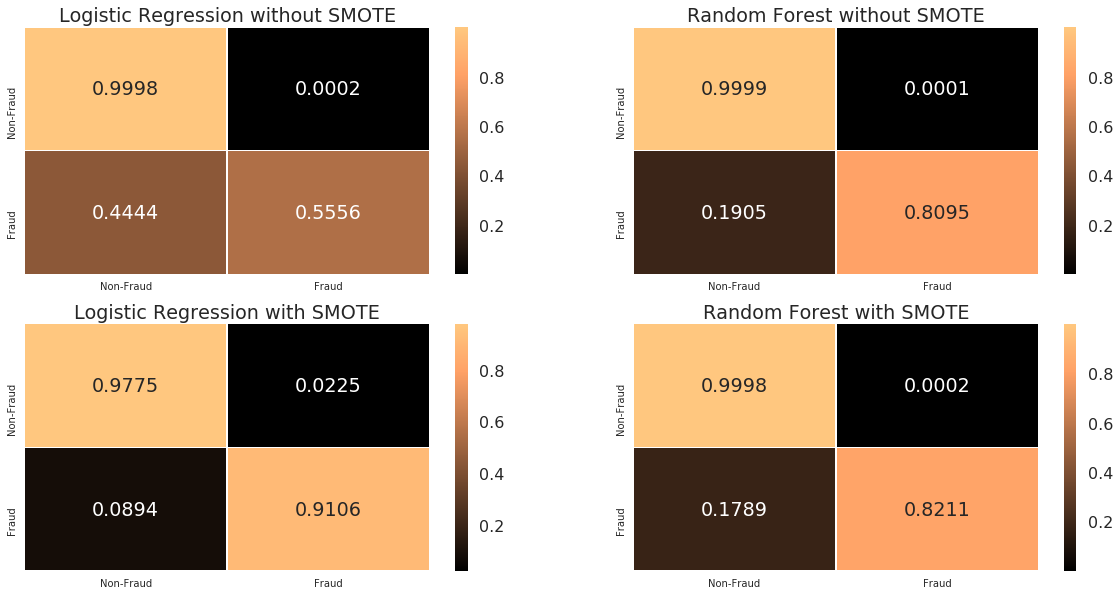

In [31]:
columns=['Non-Fraud', 'Fraud']
#Distribution plot with a dark grid and a few style elements for better visibility
sns.set(style="darkgrid",color_codes=True)
fig, ax = plt.subplots(2, 2,figsize=(20,10))
sns.despine(left=True)
sns.set_context("poster")

#First plot - Confusion matrix of Logistic Regression without SMOTE and Random Search CV
confusion_logreg = confusion_logreg.astype('float') / confusion_logreg.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_logreg,annot=True,ax=ax[0][0],cmap='copper',linewidths=.5,fmt=".4f",xticklabels=columns, yticklabels=columns)
ax[0][0].set_title('Logistic Regression without SMOTE')

#Second Plot - Confusion matrix of Random Forest without SMOTE and Random Search CV
confusion_rfc = confusion_rfc.astype('float') / confusion_rfc.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_rfc,annot=True,linewidths=.5,ax=ax[0][1],cmap='copper',fmt=".4f",xticklabels=columns, yticklabels=columns)
ax[0][1].set_title('Random Forest without SMOTE')

#Third Plot - Confusion matrix of Logistic Regression with SMOTE and Random Search CV
confusion_logreg_smote = confusion_logreg_smote.astype('float') / confusion_logreg_smote.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_logreg_smote,annot=True,ax=ax[1][0],cmap='copper',linewidths=.5,fmt=".4f",xticklabels=columns, yticklabels=columns)
ax[1][0].set_title('Logistic Regression with SMOTE')

#Fourth Plot - Confusion matrix of Random Forest with SMOTE and Random Search CV
confusion_rf_smote = confusion_rf_smote.astype('float') / confusion_rf_smote.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_rf_smote,annot=True,linewidths=.5,ax=ax[1][1],cmap='copper',fmt=".4f",xticklabels=columns, yticklabels=columns)
ax[1][1].set_title('Random Forest with SMOTE')

A normalized confusion matrix of each of the four techniques we used is shown above. Observe how SMOTE impacts our results. In particular look at the __[Fraud,Fraud]__ position, which indicates the __True positives__.

__AUC ROC CURVES__
- In order to evaluate the performance of classifiers on an imbalanced dataset, Area Under the ROC curve is an important evaluation metric to consider.
- It gives True positive rate vs False positive Rate for every classification probability threshold (from 0 to 1)
- Good classifiers have a scores close to 1 and a classifier should have atleast 0.5 to be considered okay.
- Let us look at how Logisitic Regression and Random Forest classifiers have performed when used with SMOTE.

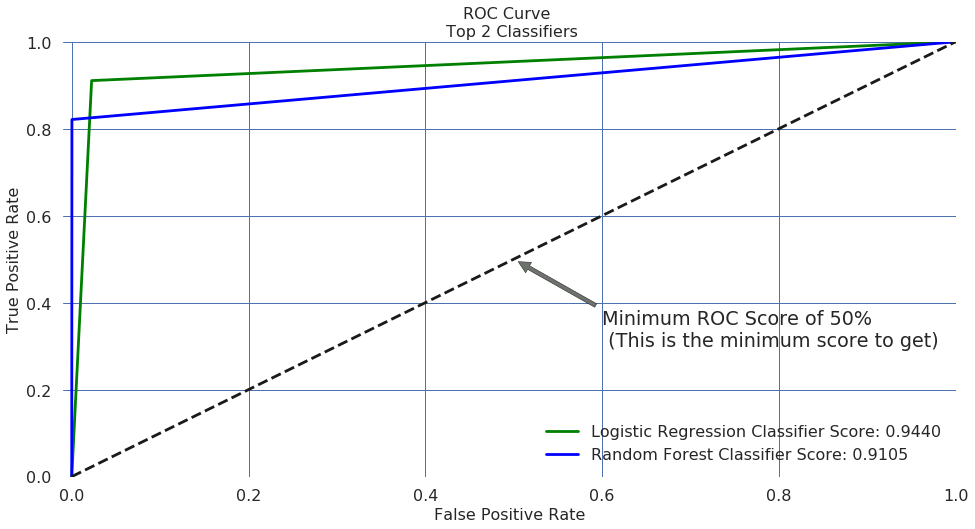

In [32]:
from sklearn.metrics import roc_auc_score
def graph_roc_curve_multiple(log_fpr, log_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.grid(color='b', linestyle='-', linewidth=1)
    plt.title('ROC Curve \n Top 2 Classifiers', fontsize=16)
    plt.plot(log_fpr, log_tpr,color='green', label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(S_Y_test, Test_Predictions_1)))
    plt.plot(rf_fpr, rf_tpr,color='blue', label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(S_Y_test, Test_Predictions)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rf_fpr, rf_tpr)
plt.show()

__Inference__
- True Positive : Correctly identifying fraud cases
- False Positive: Identifying a Non-fraud case as Fraud case.
- True Negative : Correctly identifying a Non-Fraud case
- False Negative: Identifying a Fraud case as Non-Fraud case.

__Classification Report metrics__
- Recall : (TP/TP+FN)
- Precision : (TP/TP+FP)
- False Positive rate: (FP/FP+TN)
- F1 = 2  (precision x recall) / (precision + recall)

__Null hypothesis      H0 :__ Case is Non-Fraud<br>
__Alternate hypothesis H1 :__ Case is Fraud

__Our Goal is to reduce False Negatives as much as possible__. We do not want Fraud transactions to be misclassified (Type 2 error). A high Recall Metric is the key to this. 
On the Other hand, Identifying Non-fraud cases as Fraud (Type 1 error) might negatively impact customer relationships, since customers may get angry if a transaction is halted due to misclassification.

__Precision vs Recall:__ Precision is our model's ability to make True Fraud predictions among all the Fraud predictions made. As precision increases, model's ability to make fraud predictions and hence recall decreases. Therefore, there is a Trade-off between Precision and recall.

__Conclusion__
1. Looking at the Confusion matrices shown above, Logistic Regression with SMOTE has the highest accuracy of predicting Frauds i.e The Model has a high Recall of 91%

2. Random Forest with SMOTE comes second. The model has a Recall of 81% and the number of False positives (Type 1 error - incorrectly classifying Non-Frauds as Frauds) is also very low.

3. Random Forest without SMOTE and logistic Regression without SMOTE seem to overfit and are less accurate, looking at True positives on the confusion matrix.

4. Finally, between the top 2 classifiers on our test, Logisitic Regression seems the best, based on evidence from the ROC curve.

__Hence, Logistic Regression with SMOTE seems to be a good approach to combat a Credit Fraud Detection Problem with Imbalanced Data.__